In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

data = pd.read_csv(r"C:\Users\Owner\OneDrive\Desktop\data science assingment\RANDOM FOREST\Fraud_check.csv")

print(data.head())
data['risk'] = data['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')
X = data.drop(['Taxable.Income', 'risk'], axis=1)  
y = data['risk']  


X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


  Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO  
Accuracy: 0.7333333333333333
Classification Report:
              precision    recall  f1-score   support

        Good       0.77      0.94      0.85        94
       Risky       0.00      0.00      0.00        26

    accuracy                           0.73       120
   macro avg       0.39      0.47      0.42       120
weighted avg       0.60      0.73      0.66       120



NaN values before imputation:
CompPrice           0
Income              0
Advertising         0
Population          0
Price               0
Age                 0
Education           0
ShelveLoc_Bad       0
ShelveLoc_Good      0
ShelveLoc_Medium    0
Urban_No            0
Urban_Yes           0
US_No               0
US_Yes              0
dtype: int64
NaN values after imputation in X_train:
CompPrice           0
Income              0
Advertising         0
Population          0
Price               0
Age                 0
Education           0
ShelveLoc_Bad       0
ShelveLoc_Good      0
ShelveLoc_Medium    0
Urban_No            0
Urban_Yes           0
US_No               0
US_Yes              0
dtype: int64

NaN values after imputation in X_test:
CompPrice           0
Income              0
Advertising         0
Population          0
Price               0
Age                 0
Education           0
ShelveLoc_Bad       0
ShelveLoc_Good      0
ShelveLoc_Medium    0
Urban_No            0
Urban_

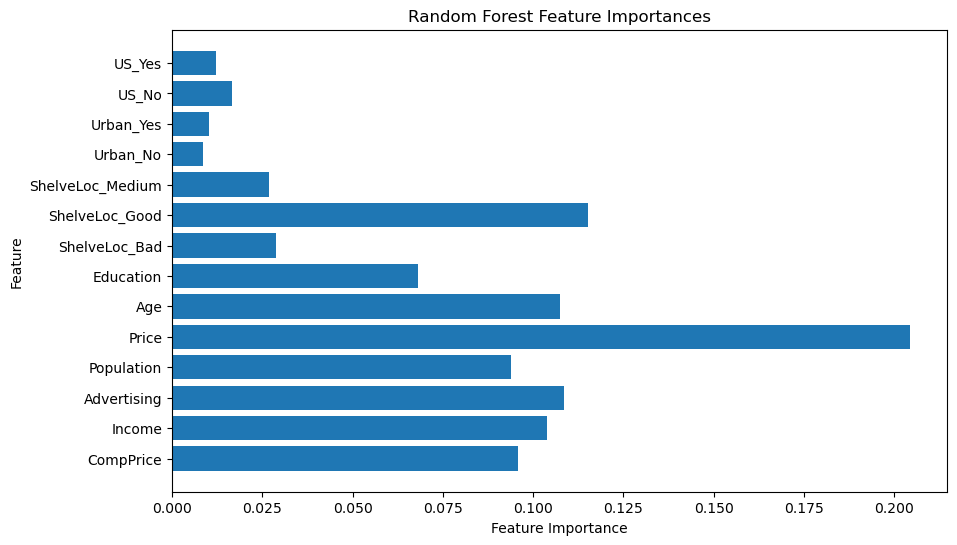

In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt



data = pd.read_csv(r"C:\Users\Owner\OneDrive\Desktop\data science assingment\RANDOM FOREST\Company_Data.csv")


data['Sales_Category'] = pd.cut(data['Sales'], bins=[0, 10, 20, 30, float('inf')], labels=['Low', 'Medium', 'High', 'Very High'])

data.drop('Sales', axis=1, inplace=True)

X = data.drop('Sales_Category', axis=1)
y = data['Sales_Category']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("NaN values before imputation:")
print(X_train.isna().sum())


imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

print("NaN values after imputation in X_train:")
print(pd.DataFrame(X_train_imputed, columns=X_train.columns).isna().sum())
print("\nNaN values after imputation in X_test:")
print(pd.DataFrame(X_test_imputed, columns=X_test.columns).isna().sum())


y_train_imputed = y_train.fillna(method='ffill') 
y_test_imputed = y_test.fillna(method='ffill') 

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_imputed, y_train_imputed)

feature_importances = rf_classifier.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.show()

